In [2]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym


In [3]:
# 動画の描画関数の宣言
# 参考URL http://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
               dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)

    anim.save('movie_cartpole.mp4')  # 追記：動画の保存です
    display(display_animation(anim, default_mode='loop'))


In [4]:
# CartPoleをランダムに動かす

frames = []
env = gym.make('CartPole-v0')
observation = env.reset()  # 最初に環境のresetが必要

for step in range(0, 200):
    frames.append(env.render(mode='rgb_array'))  # framesに各時刻の画像を追加していく
    action = np.random.choice(2)  # 0(カートを左に押す), 1(カートを右に押す)をランダムに返す
    observation, reward, done, info = env.step(action)  # actionを実行する

# 注意：実行後にipykernel_launcher.p...というindowが開いて固まりますが放置しておいてください

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


MovieWriter ffmpeg unavailable. Trying to use pillow instead.


ValueError: unknown file extension: .mp4

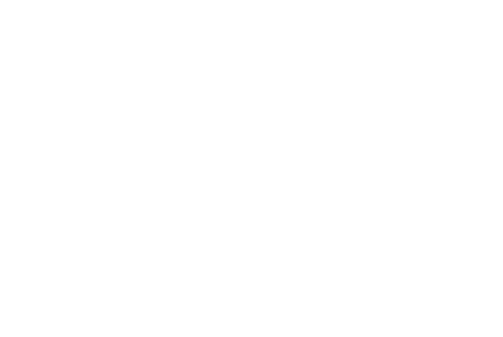

In [5]:
display_frames_as_gif(frames)